
TOPSIS Analysis Result saved to outputs.csv


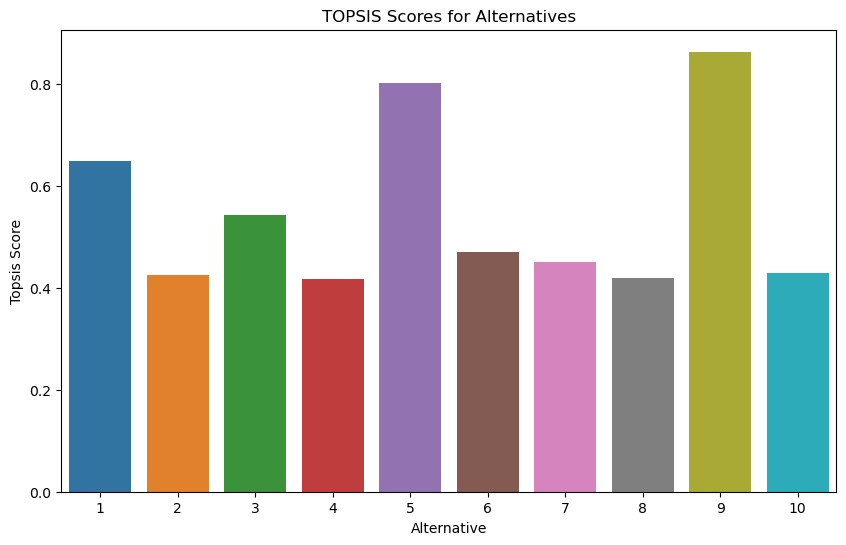

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def topsis_analysis(input_file, weights_str, impacts_str, output_file):
    try:
        abc = pd.read_csv(input_file)
        data = abc.values[:, 1:]
        weights = np.array(weights_str.split(',')).astype(float)
        impacts = np.array(list(impacts_str)).astype(str)

        result = topsis(data, weights, impacts)

        if result is not None:
            original_data = pd.read_csv(input_file)
            original_data['Topsis Score'] = result['Score'].values
            original_data['Rank'] = result['Rank'].values
            original_data.to_csv(output_file, index=False)

            print(f"\nTOPSIS Analysis Result saved to {output_file}")

            # Generate and save a bar plot for Topsis Scores
            plt.figure(figsize=(10, 6))
            sns.barplot(x=original_data.index + 1, y='Topsis Score', data=original_data)
            plt.title('TOPSIS Scores for Alternatives')
            plt.xlabel('Alternative')
            plt.ylabel('Topsis Score')
            plt.savefig('topsis_scores_bar_plot.png')
            plt.show()

            # Generate and save a table for the TOPSIS results
            result_table = result[['Score', 'Rank']]
            result_table.to_csv('topsis_results_table.csv', index=True)

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def topsis(decision, weights, impacts):
    decision = np.array(decision).astype(float)

    nrow, ncol = decision.shape
    weights = weights / sum(weights)

    N = np.zeros((nrow, ncol))

    nf = np.sqrt(np.sum(decision**2, axis=0))

    for i in range(nrow):
        for j in range(ncol):
            N[i][j] = decision[i][j] / nf[j]

    W = np.diag(weights)
    V = np.matmul(N, W)

    u = np.array([max(V[:, j]) if impacts[j] == '+' else min(V[:, j]) for j in range(ncol)])
    l = np.array([max(V[:, j]) if impacts[j] == '-' else min(V[:, j]) for j in range(ncol)])

    du = np.sqrt(np.sum((V - u)**2, axis=1))
    dl = np.sqrt(np.sum((V - l)**2, axis=1))
    score = dl / (dl + du)
    result_df = pd.DataFrame({'Alternative': range(1, nrow + 1), 'Score': score})
    result_df['Rank'] = result_df['Score'].rank(ascending=False, method='min').astype(int)
    result_df = result_df.set_index('Alternative')

    return result_df

def main():
    try:
        input_file = "model_metrics.csv"
        weights_str = "0.4,0.3,0.3"
        impacts_str = "+,-,-"
        output_file = "outputs.csv"
        topsis_analysis(input_file, weights_str, impacts_str, output_file)

    except FileNotFoundError:
        print("Error: File not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()
